<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/Time%20Series%20and%20Simple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/ml_data/ave_hi_nyc.csv"
nyc = pd.read_csv(file_path)
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [24]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
# ...:
# nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
# ...:
# random_state=11)
# X_train.shape
# X_test.shape
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)
X_train.shape
X_test.shape


linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
linear_regression.coef_
linear_regression.intercept_

# train the model
predicted = linear_regression.predict(X_test)
expected = y_test

# for p, e in zip(predicted[::5], expected[::5]):
#   print(f'predicted: {p:.2f}, expected: {e:.2f}')

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)

array([38.84399018])

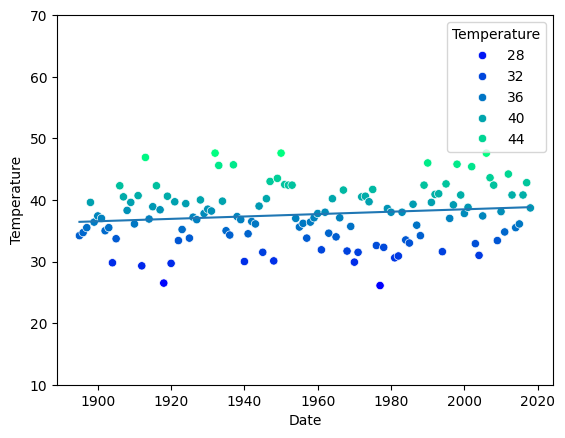

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=True)
axes.set_ylim(10,70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

line = plt.plot(x,y)